# Investigate Titanic Dataset                                                                                                            
                                                                                                                                      

## Introduction

Almost everyone knows about the Titanic. She was a big and luxury steamship and met her catastrophic end in 1912. It's been more than centries since her sinking. So I would like to investigate some facts behind the sinking. For instance, was there any relationship between the survival status and factors, like age, sex, travel class and travel companion type? In this analysis, independent varialbes are age, sex, ticket class and travel companion type, whereas dependent variable is the survival status.



## Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Load data from csv
titanic_df=pd.read_csv('titanic-data.csv')
# Create a dataframe for selected variables in the Titanic dataset
pass_dic_df=titanic_df.loc[:, lambda titanic_df: ['PassengerId','Survived', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch']]
print pass_dic_df.transpose()

              0       1       2       3     4     5     6     7       8    \
PassengerId     1       2       3       4     5     6     7     8       9   
Survived        0       1       1       1     0     0     0     0       1   
Age            22      38      26      35    35   NaN    54     2      27   
Sex          male  female  female  female  male  male  male  male  female   
Pclass          3       1       3       1     3     3     1     3       3   
SibSp           1       1       0       1     0     0     0     3       0   
Parch           0       0       0       0     0     0     0     1       2   

                9    ...    881     882   883   884     885   886     887  \
PassengerId      10  ...    882     883   884   885     886   887     888   
Survived          1  ...      0       0     0     0       0     0       1   
Age              14  ...     33      22    28    25      39    27      19   
Sex          female  ...   male  female  male  male  female  male  female  

In [3]:
pass_dic_df['Sex'].astype('category').describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [4]:
# Create a dataframe for non-survived passengers
non_surv_pass_df=pass_dic_df.groupby('Survived').get_group(0)
# Create a dataframe for survived passengers
surv_pass_df=pass_dic_df.groupby('Survived').get_group(1)
print non_surv_pass_df.head()
print surv_pass_df.head()

   PassengerId  Survived   Age   Sex  Pclass  SibSp  Parch
0            1         0  22.0  male       3      1      0
4            5         0  35.0  male       3      0      0
5            6         0   NaN  male       3      0      0
6            7         0  54.0  male       1      0      0
7            8         0   2.0  male       3      3      1
   PassengerId  Survived   Age     Sex  Pclass  SibSp  Parch
1            2         1  38.0  female       1      1      0
2            3         1  26.0  female       3      0      0
3            4         1  35.0  female       1      1      0
8            9         1  27.0  female       3      0      2
9           10         1  14.0  female       2      1      0


In [5]:
# Create dummy variables for variable 'Sex' 
# and a new dataframe with all the selected variables presented as numbers
pass_num_dic_df= pd.get_dummies(pd.DataFrame(pass_dic_df), columns=['Sex'], drop_first=True)
print pass_num_dic_df.head()

   PassengerId  Survived   Age  Pclass  SibSp  Parch  Sex_male
0            1         0  22.0       3      1      0         1
1            2         1  38.0       1      1      0         0
2            3         1  26.0       3      0      0         0
3            4         1  35.0       1      1      0         0
4            5         0  35.0       3      0      0         1


In [6]:
# Summary statistics on the selected variables of all the passengers
pass_dic_df.describe()
pass_dic_df.Pclass.astype('category').describe()
pass_dic_df.Sex.astype('category').describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [7]:
# Summary statistics on the selected variables of the survivors
surv_pass_df.describe()
surv_pass_df.Pclass.astype('category').describe()
surv_pass_df.Sex.astype('category').describe()

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

### Summary statistics on selected variables from Titanic dataset

<table align="center">  <tr><td> </td> <th  colspan='5'>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; All the passengers</th> <th  colspan='5'>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Survived passengers</th></tr>  <tr><td>&nbsp;Selected Variable&nbsp; </td> <th>Age</th> <th>Sex</th> <th>Travel Class</th> <th>Number of Travel Partners (Siblings/Spouse)</th><th>Number of Travel Partners (Parents/Children)</th>  <th>Age</th>  <th>Sex</th> <th>Travel Class</th> <th>Number of Travel Partners (Siblings/Spouse)</th> <th>Number of Travel Partners (Parents/Children)</th></tr>   <tr><th>Total Number of Available Data</th> <td>714</td> <td>891</td> <td>891</td><td>891</td> <td>891</td><td>290</td> <td>342</td> <td>342</td> <td>342</td> <td>342</td></tr>  <tr><th>Mean</th> <td>20.382</td> <td>-</td> <td>-</td><td>0.523</td> <td>0.382</td><td>28.344</td> <td>-</td> <td>-</td> <td>0.474</td> <td>0.464</td> </tr>   <tr><th>Std</th> <td>14.526</td> <td>-</td> <td>-</td> <td>1.103</td> <td>0.806</td> <td>14.951</td> <td>-</td> <td>-</td> <td>0.709</td> <td>0.772</td> </tr>   <tr><th>Max</th> <td>80</td> <td>-</td>  <td>-</td> <td>8</td> <td>6</td> <td>80</td> <td>-</td> <td>-</td> <td>4</td> <td>5</td> </tr>  <tr><th>Min</th> <td>0.42</td> <td>-</td> <td>-</td> <td>0</td> <td>0</td> <td>0.42</td><td>-</td> <td>-</td> <td>0</td> <td>0</td> </tr>  <tr><th>75% Quantile</th> <td>38</td> <td>-</td> <td>-</td> <td>1</td> <td>0</td> <td>36</td>  <td>-</td>  <td>-</td> <td>1</td> <td>1</td></tr>  <tr><th>50% Quantile</th> <td>28</td> <td>-</td> <td>-</td> <td>0</td> <td>0</td> <td>28</td> <td>-</td> <td>-</td> <td>0</td> <td>0</td> </tr>  <tr><th>25% Quantile</th> <td>20.125</td> <td>-</td> <td>-</td> <td>0</td> <td>0</td> <td>19</td> <td>-</td> <td>-</td> <td>0</td> <td>0</td></tr> <tr><th>Unique</th> <td>-</td> <td>2</td> <td>3</td><td>-</td> <td>-</td> <td>-</td> <td>2</td> <td>3</td> <td>-</td> <td>-</td></tr>  <tr><th>Top</th> <td>-</td> <td>Male</td> <td>3</td><td>-</td> <td>-</td> <td>-</td> <td>Female</td> <td>1</td> <td>-</td> <td>-</td></tr> <tr><th>Freq</th> <td>-</td> <td>577</td> <td>491</td><td>-</td> <td>-</td> <td>-</td> <td>233</td> <td>136</td> <td>-</td> <td>-</td></tr> </table>                                                                                                                                     

Briefly, the survival rate was around 38.38% in this tragedy. Among all the selected variables, the variable age has some missing values. I'll drop the missing values for further analysis. 

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [10]:
# Define Pearson's correlation between two variables
def correlation(x, y):
    return (((x-x.mean())/x.std(ddof=0))*((y-y.mean())/y.std(ddof=0))).mean()

### Question 1: The relationship between age and the survival status

In [11]:
# Check the normality of variable 'Age' in the survived passengers
stats.normaltest(surv_pass_df.Age.dropna())

NormaltestResult(statistic=1.6177859604065434, pvalue=0.44535080559478313)

In [6]:
# Check the normality of variable 'Age' in all the passengers
stats.normaltest(non_surv_pass_df['Age'].dropna())

NormaltestResult(statistic=23.069052752540895, pvalue=9.7863071758809152e-06)

In [7]:
# Check the age difference between survived and non-survived passengers (if normally distributed)
stats.ttest_ind(surv_pass_df['Age'].dropna(), non_surv_pass_df['Age'].dropna())

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

In [8]:
# Check the age difference between survived and non-survived passengers (if non-normally distributed)
stats.mannwhitneyu(surv_pass_df['Age'].dropna(), non_surv_pass_df['Age'].dropna())

MannwhitneyuResult(statistic=57682.0, pvalue=0.080246262388688816)

According to P-values from normality test, age in the survived dataset seemed to be normally distributed (P-value > 0.05), whereas, age in the whole dataset seemed to be non-normally distributed (P-value <0.001). Therefore, according to t-test and Mann-Whitney U test, there seemed to be age difference between survived and non-survived passengers. 

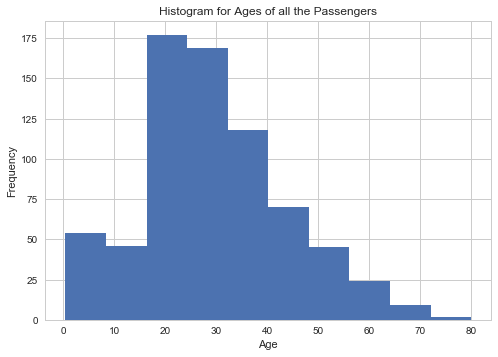

In [16]:
plt.hist(pass_dic_df.['Age'].dropna())
plt.title('Histogram for Ages of all the Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')

This histogram, which shows the ages of all the passengers, is a bit skewed right. Most of the passengers were between 0 and 56 years of age. 

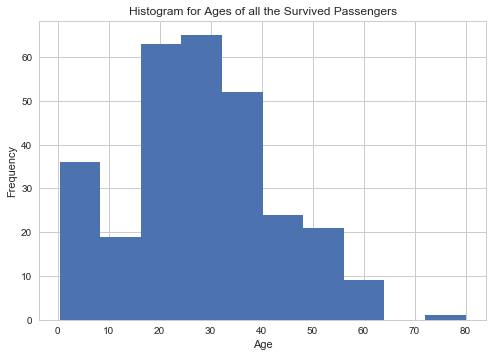

In [17]:
plt.hist(surv_pass_df['Age'].dropna())
plt.title('Histogram for Ages of all the Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')

The graph above is almost symmetric, which shows the ages of the survived passengers. Most of the survived passengers were between 0 and 63 years of age. A handful were 72 years or older. Those aged between 15-40 years seemed to survive the most. 

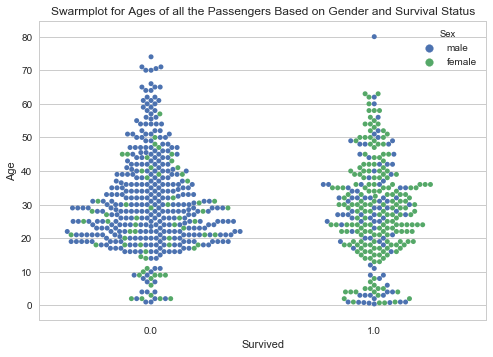

In [17]:
sns.swarmplot(x=pass_dic_df['Survived'], y=pass_dic_df['Age'], hue=pass_dic_df['Sex'])
plt.title('Swarmplot for Ages of all the Passengers Based on Gender and Survival Status')

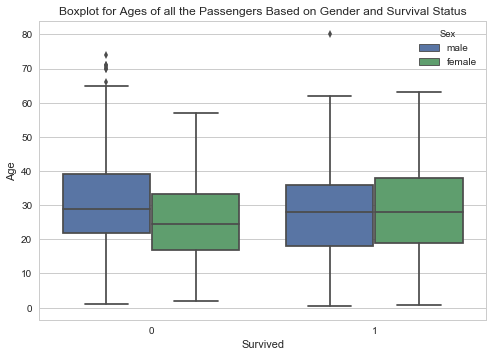

In [23]:
sns.boxplot(x=pass_dic_df['Survived'], y=pass_dic_df['Age'], hue=pass_dic_df['Sex'])
plt.title('Boxplot for Ages of all the Passengers Based on Gender and Survival Status')

According to the graphs above, middle aged males tended to have less chance to survive and most survived females were inclined to be between 20 to 40 years old. 

There seemed to be a connection between age and survival chance. Passengers aged 20-40 years old seemed to have more chance to survive. This might be due to their physical advantage. They were more likely to get better chance to evacuate compared to the other age groups.  

In [13]:
# Check the correlation between age and the survival status
print correlation(pass_dic_df['Age'], pass_dic_df['Survived'])

-0.0779826784139


There seemed to be a weak negative correlation between age and the survival status. In general, younger passengers probably tended to have a higher survival rate.   

### Question 2: The relationship between gender and the survival status

In [10]:
import collections
import numpy as np

def tita_array(data):
    tita_lis=[]
    tita_count=collections.Counter(data.dropna())
    for key in tita_count:
        tita_lis.append(tita_count[key])
    return np.array([tita_lis])

sex_tita=np.concatenate((tita_array(surv_pass_df['Sex']), tita_array(non_surv_pass_df['Sex'])), axis=0)
class_tita=np.concatenate((tita_array(surv_pass_df['Pclass']), tita_array(non_surv_pass_df['Pclass'])), axis=0)
print 'Contingency table for gender:', sex_tita
print 'Contingency table for travel class:', class_tita

Contingency table for gender: [[109 233]
 [468  81]]
Contingency table for travel class: [[136  87 119]
 [ 80  97 372]]


In [11]:
# Check the gender difference between survived and non-survived passengers
chi2_sta, p_value, dof, expected =stats.chi2_contingency(sex_tita)
print p_value

1.19735706278e-58


Gender seemed to play a significant role in the survival status. It seemed that females were likely to be given priority to evacuate during the accident, that is, female passengers tended to have a higher survival rate. 

In [7]:
# Check the correlation between gender and the survival status
import statsmodels.formula.api as sm
lm=sm.ols("Survived ~ Sex_male", data=pass_num_dic_df).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           1.41e-69
Time:                        08:03:59   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7420      0.023     32.171      0.0

In [8]:
# Check how the survival status was associated with gender and age together 
lm=sm.ols("Survived ~ Sex_male+Age", data=pass_num_dic_df).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           7.77e-54
Time:                        08:04:05   Log-Likelihood:                -382.61
No. Observations:                 714   AIC:                             771.2
Df Residuals:                     711   BIC:                             784.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7805      0.039     19.792      0.0

We can see that there seemed to be a significant strong correlation between gender and the survival status. And the negative sign further confirmed that females were more likely to survive compared to males. By considering the age effect, gender still seemed to have a strong association with the survival status, whereas, age seemed to have non-significant effect on the survival chance. 

### Question 3: The relationship between travel class and the survival status

In [12]:
# Check the travel class difference between survived and non-survived passengers
chi2_sta, p_value, dof, expected =stats.chi2_contingency(class_tita)
print p_value

4.5492517113e-23


As P-value above was less than 0.001, travel class tended to significantly affect survival status. First class passengers were likely to survive from the accident. The reason for this might be that the better space around the seats provided more chance to find good position to evacuate during the crash.

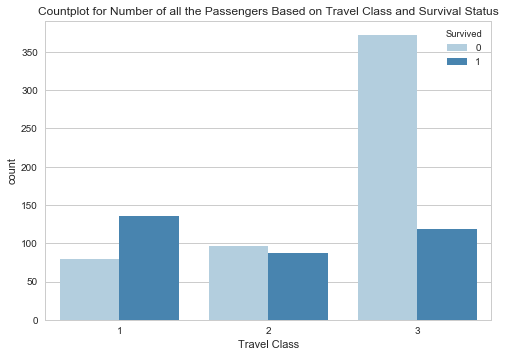

In [38]:
sns.countplot(x=pass_dic_df['Pclass'], hue=pass_dic_df['Survived'], palette="Blues")
plt.title('Countplot for Number of all the Passengers Based on Travel Class and Survival Status')
plt.xlabel('Travel Class')

It looks like those having Third class tickets were less likely to survive from the accident. 

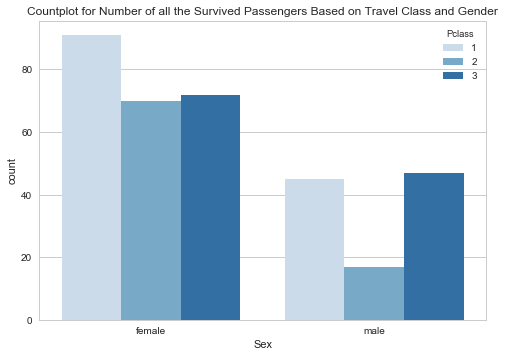

In [35]:
sns.countplot(x=surv_pass_df['Sex'], hue=surv_pass_df['Pclass'], palette="Blues")
plt.title('Countplot for Number of all the Survived Passengers Based on Travel Class and Gender')

This graph demonstrates that female passengers were more likely to survive, especially for those having First and Second class tickets compared to male ones. This tells that females tended to be given priority to evacuate and First-class-ticket holders had higher chances to survive during the sinking. 

In [9]:
# Check the correlation between travel class and the survival status
lm=sm.ols("Survived ~ Pclass", data=pass_num_dic_df).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           2.54e-25
Time:                        08:04:23   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8386      0.045     18.597      0.0

In [10]:
# Check how travel class affected the survival status
from patsy.contrasts import Treatment
levels = [1,2,3]
contrast = Treatment(reference=0).code_without_intercept(levels) 
lm=sm.ols("Survived ~ C(Pclass, Treatment)", data=pass_num_dic_df).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     57.96
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           2.18e-24
Time:                        08:04:26   Log-Likelihood:                -567.30
No. Observations:                 891   AIC:                             1141.
Df Residuals:                     888   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Travel class seemed to be another factor to affect the survival rate of the Titanic tragedy. Travelling with the First class tended to significantly increase the survival rate. And female passengers were inclined to receive more help and priority to evacuate no matter what travel class they had. Travel class seemed to negatively correlated to the survival status, that is, the higher the travel class (denoted by smaller number) the higher the survival status. There seemed to be a positive association between travelling with the First class and the survival rate and a weak negative correlation between the Third travel class and the survival chance.  

### Question 4: The relationship between the number of travel partners and the survival status

#### 4.1 The number of travel partners as siblings or spouse and the survival chance 

In [9]:
# Check the normality of variable 'SibSp' in the survived passengers
stats.normaltest(surv_pass_df['SibSp'].dropna())

NormaltestResult(statistic=152.60625675546785, pvalue=7.277335438853156e-34)

In [10]:
# Check the difference in the number of travel partners as siblings/spouse between survived and non-survived passengers
stats.mannwhitneyu(surv_pass_df['SibSp'].dropna(), non_surv_pass_df['SibSp'].dropna())

MannwhitneyuResult(statistic=85775.0, pvalue=0.0040083420295843964)

As the number of travel partners as siblings or spouse in this dateset didn't seem to be normally distributed, based on Mann-Whitney U test, the number of this travel companions significantly affected the chance for surviving during the sinking. 

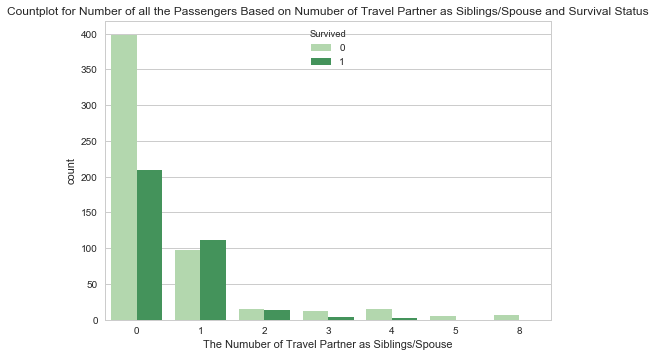

In [39]:
sns.countplot(x=pass_dic_df['SibSp'], hue=pass_dic_df['Survived'], palette="Greens")
plt.title('Countplot for Number of all the Passengers Based on Numuber of Travel Partner as Siblings/Spouse and Survival Status')
plt.xlabel('The Numuber of Travel Partner as Siblings/Spouse')

It looks like the less the number of travel companions as siblings or spouse, the higher the survival or non-survival chance. 

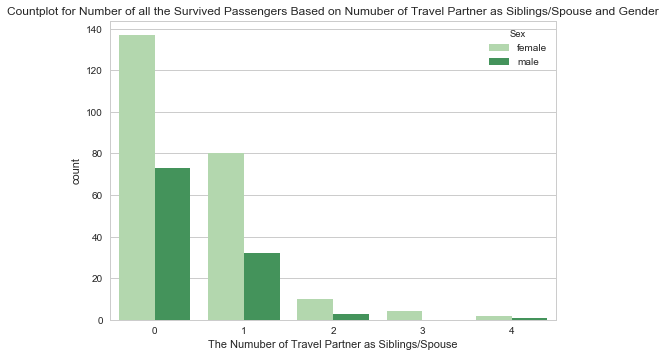

In [43]:
sns.countplot(x=surv_pass_df['SibSp'], hue=surv_pass_df['Sex'], palette="Greens");
plt.title('Countplot for Number of all the Survived Passengers Based on Numuber of Travel Partner as Siblings/Spouse and Gender')
plt.xlabel('The Numuber of Travel Partner as Siblings/Spouse')

In [16]:
# Check the correlation between 'SibSp' and the survival status
print correlation(pass_num_dic_df['SibSp'], pass_num_dic_df['Survived'])

-0.0353224988857


This illustrates that females who travelled alone were more likely to survive compared to males travelling alone. However, the survival chance for both gender decreased with the number of travel companions as siblings or spouse increasing. There seemed to be a weak negative correlation between the survival chance and the number of travel companions as siblings or spouse.

#### 4.2 The number of travel partners as parents or children and the survival chance 

In [11]:
# Check the normality of variable 'Parch' in the survived passengers
stats.normaltest(surv_pass_df['Parch'].dropna())

NormaltestResult(statistic=125.74490120551273, pvalue=4.952695634975023e-28)

In [12]:
# Check the difference in the number of travel partners as parents/children between survived and non-survived passengers
stats.mannwhitneyu(surv_pass_df['Parch'].dropna(), non_surv_pass_df['Parch'].dropna())

MannwhitneyuResult(statistic=82385.0, pvalue=1.856245454189228e-05)

The number of travel partners as parents or childeren was likely to be non-normally distributed. According to the results from Mann-Whitney U test, the survival status seemed to be significantly affected by the number of travel companions as parents or children. 

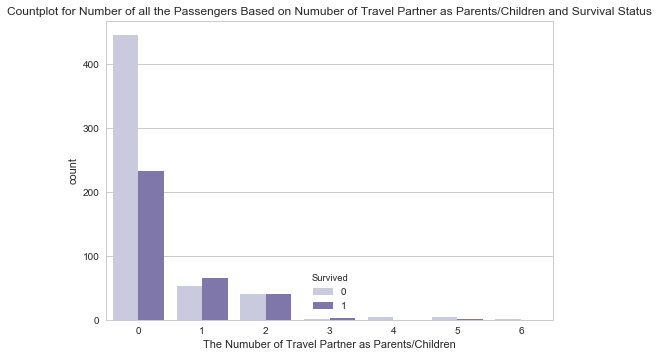

In [11]:
sns.countplot(x=pass_dic_df['Parch'], hue=pass_dic_df['Survived'], palette="Purples")
plt.title('Countplot for Number of all the Passengers Based on Numuber of Travel Partner as Parents/Children and Survival Status')
plt.xlabel('The Numuber of Travel Partner as Parents/Children')

This graph also tells that the higher the number of travel companions as parents or children, the less the survival or non-survival chance. That is, there seemed to be a negative relationship between the number of travel companions and the survival chance. 

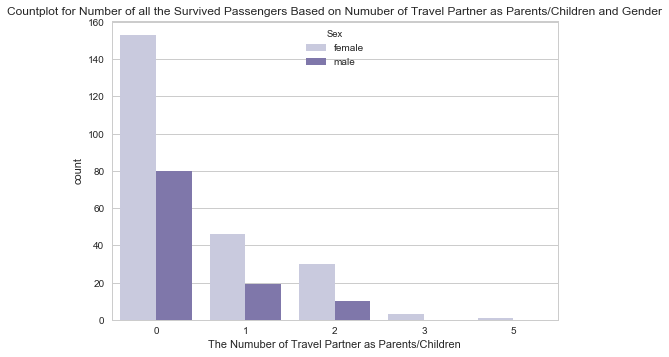

In [12]:
sns.countplot(x=surv_pass_df['Parch'], hue=surv_pass_df['Sex'], palette="Purples");
plt.title('Countplot for Number of all the Survived Passengers Based on Numuber of Travel Partner as Parents/Children and Gender')
plt.xlabel('The Numuber of Travel Partner as Parents/Children')

In [17]:
# Check the correlation between 'Parch' and the survival status
print correlation(pass_num_dic_df['Parch'], pass_num_dic_df['Survived'])

0.0816294070835


In terms of the number of travel companions as parents or children, the graph above still shows that female passengers accounted for the higher number of the survivors in the Titanic accident. The survival chance and the number of travel companions as parents or children seemed to be positively correlated, though this trend did not show very strongly. 

In a nutshell, it seemed that there were significant gender, travel class and number of travel  companions differences between survived and non-survived passengers during the Titanic tragedy. Female passengers tended to have higher chances to survive compared to male ones. Passengers having First class tickets were inclined to have higher survival chances. Travelling with less companions seemed to increase the survival rate greatly. Interestingly, the higher the number of travel partners as parents or children the more likely the survival chance, whereas, the higher the number of travel partners as siblings or spouse the less likely the survival chance. Age might be a factor to affect the survival rate.  

## Conclusion

Factors, such as sex, travel class and the number of travel partners, could significantly affect the survival chance in the Titanic accident. It turned out that the higher the number of travel partners the less likely the survival chance, which might be due to distraction. That is, part of attention was used to take care of companions instead of their own. Passengers travelling with parents/children might tend to have the higher survival rate than those travelling with siblings/spouse. Age seemed to have an effect on the survival rate. However, more data might be needed to make further conclusion. Generally, the middle-aged males seemed to have less chance to survive, which was probably due to their physical advantage to take more part in helping rescue others first. Compared to male passengers, female passengers were more likely to survive. This was because females were probably the ones who were receiving help from others most and were given priority to evacuate most. And if travelling with First class tickets, people seemed to have more chances to survive. The reason for this might be that these areas were less crowded and the better space around the seats provided more chances to find good position to evacuate during the accident.

However, there were some limitations on the data collection and analysis. Speaking of the data collection, there might be a selection bias. The sample size (891) in this dataset seemed not big enough compared to the number of all the people on board (around 2,224), which might not present the whole picture. Getting more data might help to increase the validity of the study. In terms of variable 'Age', there were some missing values that were dropped during the analysis, which could lead to skewed results due to decreased degree of freedom. Maybe the missing values substituted by the mean of age could have increased the statistical power. While investigating the association between proposed factors and the survival rate, there could be confounding variables that affect the perceived correlation. Further deep analysis would be needed to make estimations more accurate. Lack of outliers detection could be another issue of this analysis, which could lead to inaccurate results. For further analysis, I would try to identify and eliminate all the possible bias in a way to increase the validity and reliability of the study. It would be interested to see how the other unselected variables played their roles in the survival status, how all the available variables combined together to affect the survival rate and whether there were some confounding variables having hidden effects on the outcome. Additionally, I would also look into why the Second travel class seemed to have the lowest survival rate compared to the other two travel classes. All in all, in order to make the data be of value and of use, it is necessary to have well-chosen and well-implemented methods for data collection and analysis. 

## References

C. Albon. Descriptive Statistics For pandas Dataframe
https://chrisalbon.com/python/pandas_dataframe_descriptive_stats.html

J. Gruber. Markdown: Syntax.  
http://daringfireball.net/projects/markdown/syntax#html

M. Waskom. Choosing color palettes
http://seaborn.pydata.org/tutorial/color_palettes.html

M. Waskom. Plotting with categorical data
https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

Pydata.org. Group By: split-apply-combine. http://pandas.pydata.org/pandas-docs/stable/groupby.html

Pydata.org. Indexing and Selecting Data
http://pandas.pydata.org/pandas-docs/stable/indexing.html#missing-values

Pydata.org. Pandas.get_dummies. http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Stack Overflow. How to convert string into float value in the dataframe.
http://stackoverflow.com/questions/30121181/how-to-convert-string-into-float-value-in-the-dataframe

Stack Overflow. Run an OLS regression with Pandas Data Frame.
http://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

Statsmodels.org. Patsy: Contrast Coding Systems for categorical variables.
http://www.statsmodels.org/devel/contrasts.html

The Scipy community. Statistics (scipy.stats)
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

Wikipedia. RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic